# LTC Credit Card Fraud Analysis

## Installing Libraries

In [2]:
%%capture
!pip install pandas 
!pip install numpy
!pip install matplotlib, seaborn

Installed the required libraries for the analysis these are pandas, numpy, matplotlib and seaborn

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

imported the libraries required for the analysis and visualization and set the matplotlib inline

## Importing Dataset

In [4]:
data = pd.read_csv('../data/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


loaded the data and checked the first five rows of the data to have a look at the data

In [5]:
# check the shape of the data
data.shape

(10127, 23)

The data has 10127 rows and 23 columns that means there are 10127 customers and 23 features (parameters) for each customer

## Data Exploration, Cleaning, Visualization and Basic Statistics

In [9]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

The data has 17 numerical columns and 6 categorical columns 

In [10]:
# drop last two columns as they are not useful for descriptive analysis
data.drop(data.columns[-2:], axis=1, inplace=True)

In [11]:
# check for missing values
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values in the data

In [12]:
# drop client number
data.drop('CLIENTNUM', axis=1, inplace=True)

The client number is not useful for the analysis so we drop it

In [13]:
# Extract columns
columns = data.columns
numerical = data._get_numeric_data().columns
categorical = list(set(columns) - set(numerical))
numerical = list(numerical)
print('Numerical Columns: ', numerical)
print('Categorical Columns: ', categorical)

Numerical Columns:  ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Categorical Columns:  ['Income_Category', 'Marital_Status', 'Gender', 'Education_Level', 'Attrition_Flag', 'Card_Category']


The data has 17 numerical columns and 6 categorical columns, we have extracted the numerical and categorical columns to make the analysis easier

In [15]:
# describe the data the numerical data 
data[numerical].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Basic statistics of the numerical data are shown above, and they seem to suggest that there are outliers in the data below we visualise the desnity plots of the numerical data to see the distribution of the data

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


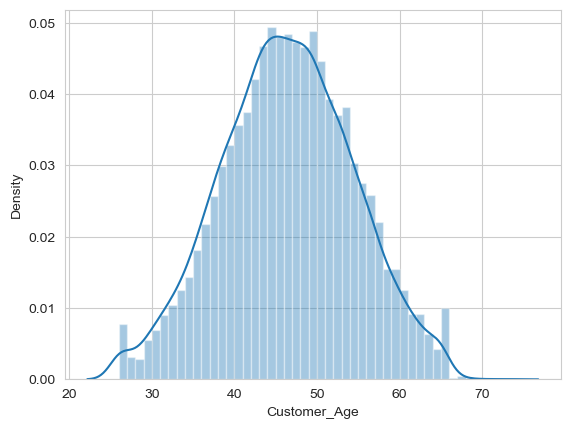

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


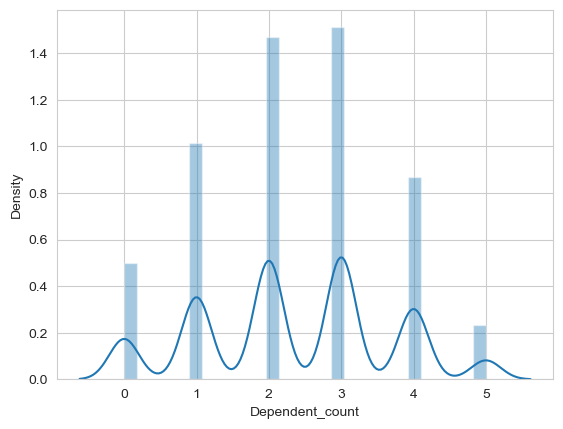

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


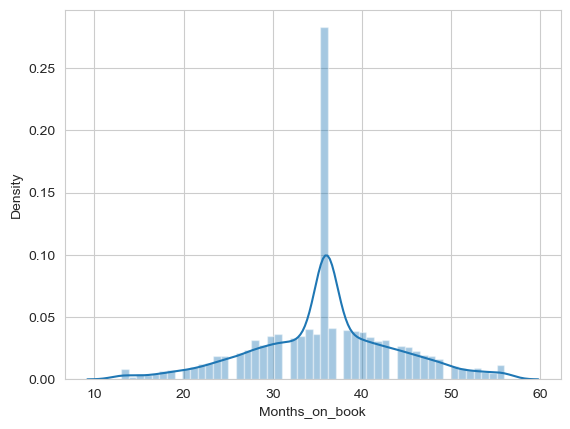

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


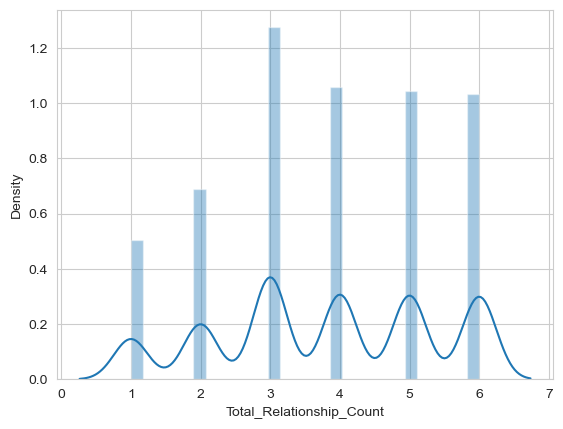

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


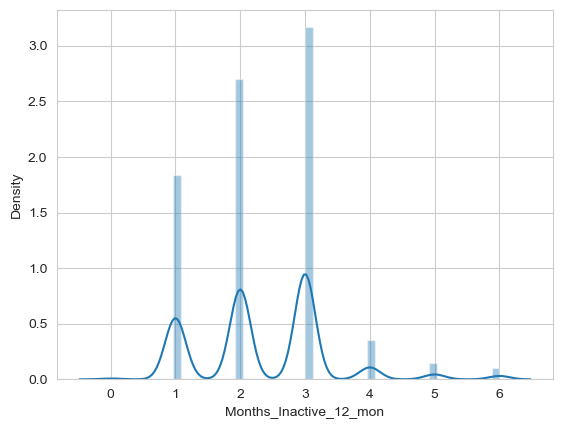

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


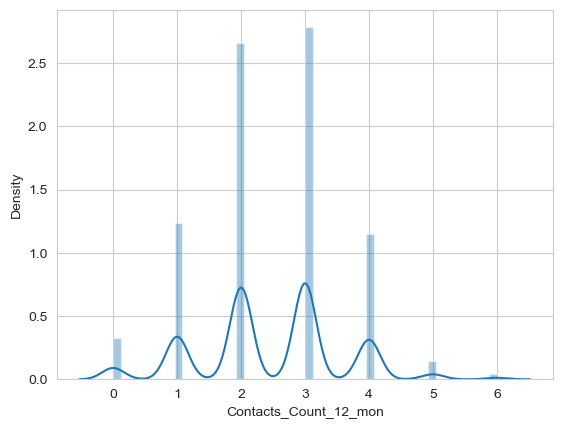

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


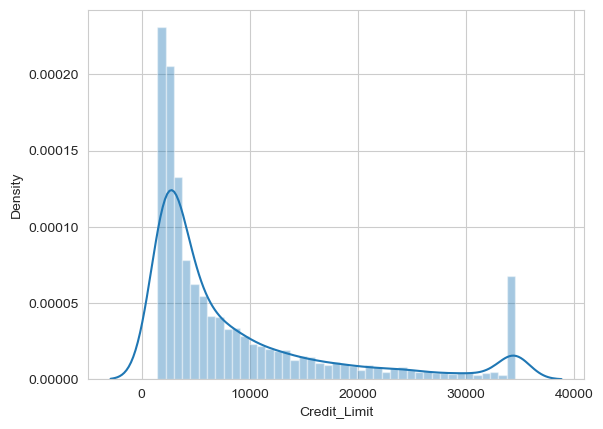

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


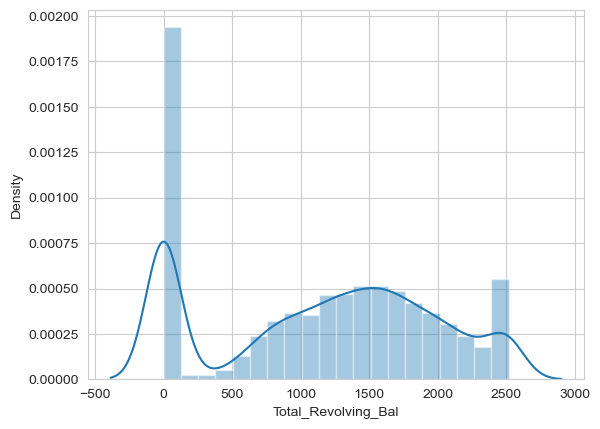

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


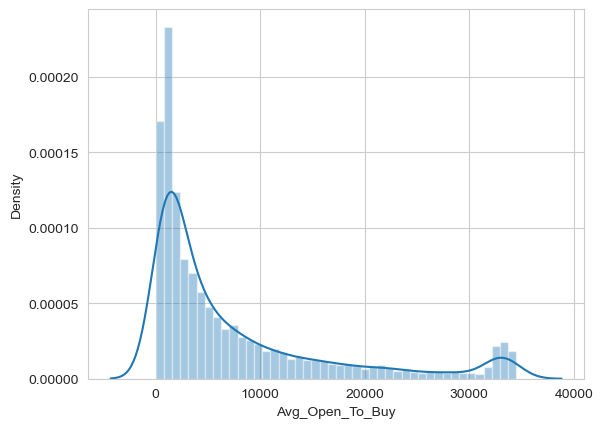

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


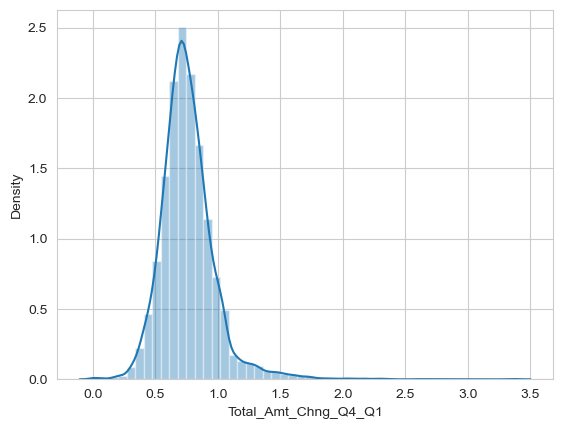

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


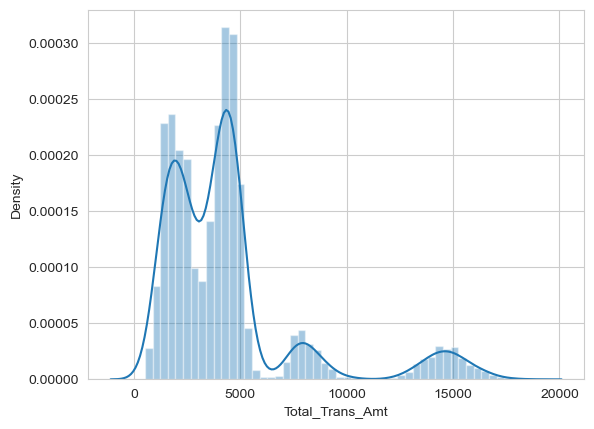

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


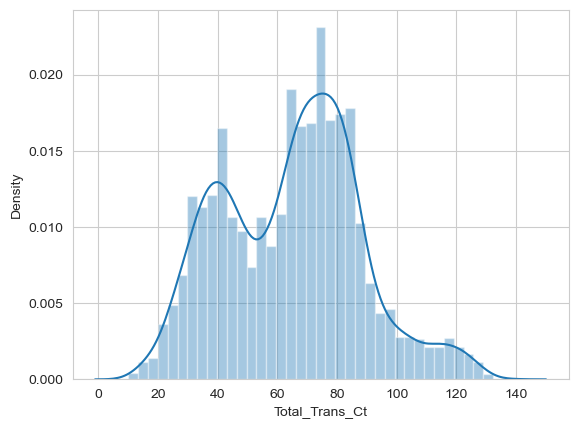

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


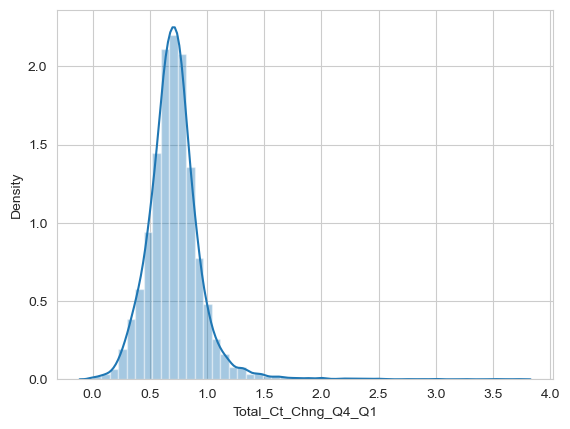

C:\Users\michael\AppData\Local\Temp\ipykernel_8664\3571963028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col]);


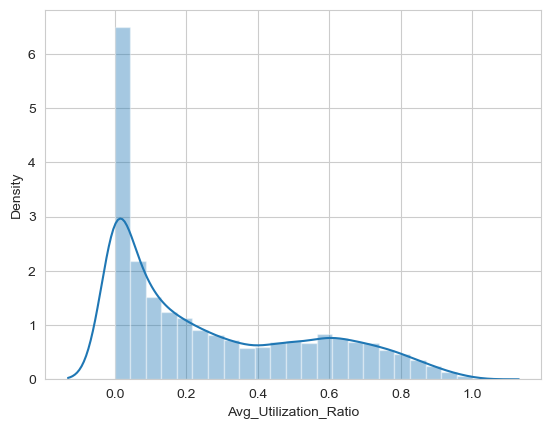

In [16]:
# plot histogram for numerical data to see the distribution and superimpose normal distribution
for col in numerical:
    sns.distplot(data[col]);
    plt.show()

The data is not normally distributed and there are outliers in the data, we will deal with the outliers later this seems to agree 2ith the basic statistics above though some variables like customer age seem to have a normal distribution

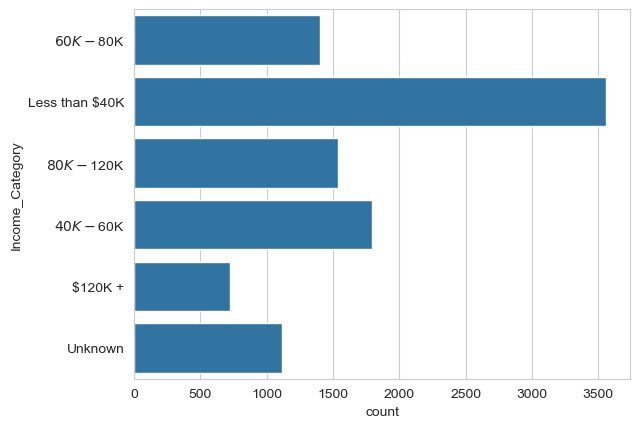

In [19]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[0], data=data, color=sns.color_palette()[0])
plt.show()


Customers with less than $40k income make up the majority of the customers

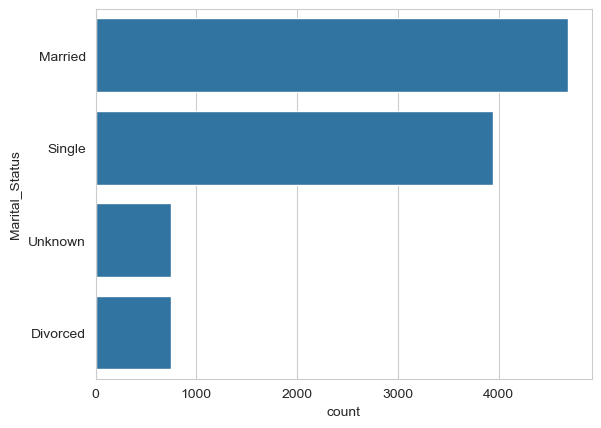

In [20]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[1], data=data, color=sns.color_palette()[0])
plt.show()

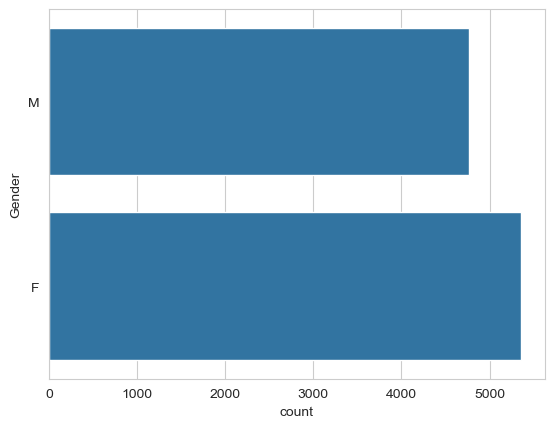

In [21]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[2], data=data, color=sns.color_palette()[0])
plt.show()

The data seems to suggest the majority of customers being female

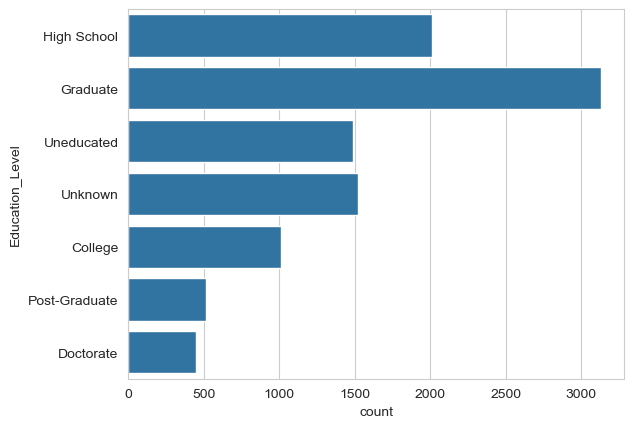

In [22]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[3], data=data, color=sns.color_palette()[0])
plt.show()

the data seems to suggest that majority are graduates and married and have income between 40k and 60k

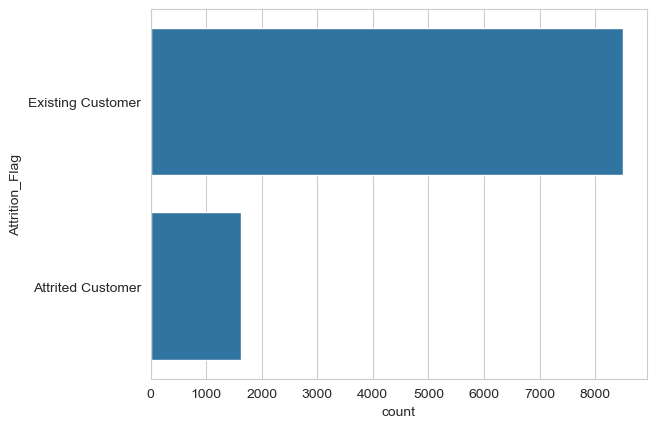

In [23]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[4], data=data, color=sns.color_palette()[0])
plt.show()

The data has more existing customers than attrited customers

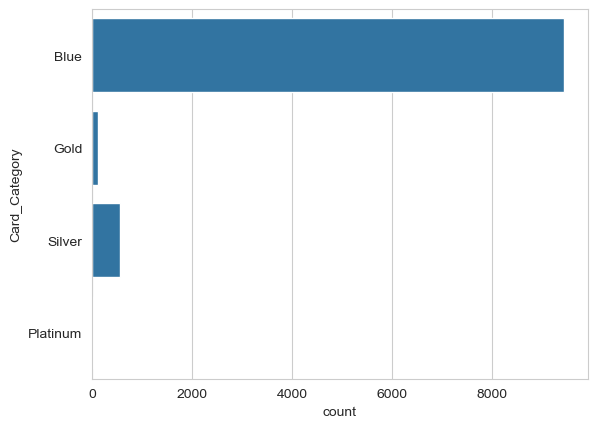

In [24]:
# describe the data the categorical data and get value counts plot bar plot
sns.countplot(y=categorical[5], data=data, color=sns.color_palette()[0])
plt.show()

The Blue cards make up the majority of the cards

## Data Cleaning

In [25]:
# deal with the unknown values in the data in categorical columns
# we calculate the percentage of unknown values in each column
for col in categorical:
    print(col, data[data[col] == 'Unknown'].shape[0]/data.shape[0] * 100)

Income_Category 10.980547052434087
Marital_Status 7.3960699121161255
Gender 0.0
Education_Level 14.999506270366346
Attrition_Flag 0.0
Card_Category 0.0


This seems to suggest that 11% of income category is unknown, 15% of education level is unknown, 7% of marital status is unknown
this is significant which could possible turn out to be some credit card fraud cases, lets investigate further


## Credit Card and Possible Fraud Analysis

,count,mean,std,min,25%,50%,75%,max
Education_Level,,,,,,,,
College,1013.0,1135.783810,826.534848,0.0,0.0,1258.0,1776.00,2517.0
Doctorate,451.0,1094.084257,789.238275,0.0,96.5,1176.0,1631.50,2517.0
Graduate,3128.0,1162.380115,810.363011,0.0,483.5,1262.0,1783.25,2517.0
High School,2013.0,1194.353204,821.377987,0.0,512.0,1320.0,1822.00,2517.0
Post-Graduate,516.0,1187.674419,832.312508,0.0,461.5,1344.0,1862.75,2517.0
Uneducated,1487.0,1154.079354,807.249052,0.0,367.0,1274.0,1751.00,2517.0
Unknown,1519.0,1160.449638,816.802016,0.0,252.0,1270.0,1785.00,2517.0


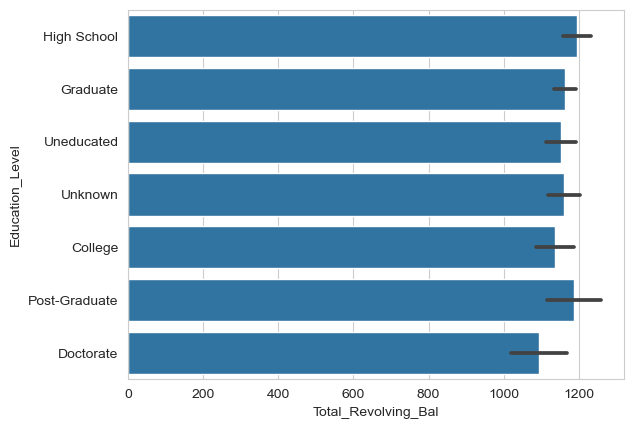

In [33]:
# check education level and revolve balance
sns.barplot(y='Education_Level', x='Total_Revolving_Bal', data=data, color=sns.color_palette()[0])
data.groupby('Education_Level')['Total_Revolving_Bal'].describe()

The data seems to suggest that the high school customers have the highest revolving balance
the data seems to suggest a relatively normal distribution of revolving balance for each education level

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,672.822987,921.385582,0.0,0.0,0.0,1303.5,2517.0
Existing Customer,8500.0,1256.604118,757.745354,0.0,800.0,1364.0,1807.0,2517.0


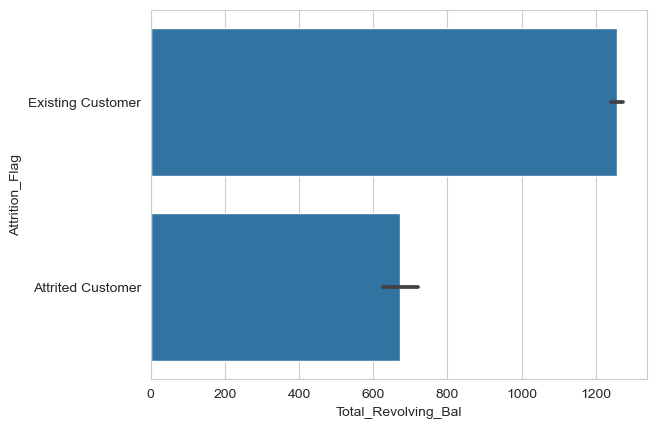

In [29]:
# revolving balance  vs attrition
sns.barplot(y='Attrition_Flag', x='Total_Revolving_Bal', data=data, color=sns.color_palette()[0])
data.groupby('Attrition_Flag')['Total_Revolving_Bal'].describe()


,count,mean,std,min,25%,50%,75%,max
Income_Category,,,,,,,,
$120K +,727.0,1222.196699,819.022063,0.0,588.5,1344.0,1859.5,2517.0
$40K - $60K,1790.0,1171.994413,797.595636,0.0,561.0,1303.5,1747.0,2517.0
$60K - $80K,1402.0,1154.993581,805.527930,0.0,463.5,1255.0,1749.0,2517.0
$80K - $120K,1535.0,1206.727036,809.944021,0.0,584.5,1324.0,1811.0,2517.0
Less than $40K,3561.0,1145.136759,823.098820,0.0,0.0,1247.0,1779.0,2517.0
Unknown,1112.0,1115.064748,829.244551,0.0,0.0,1243.0,1785.5,2517.0


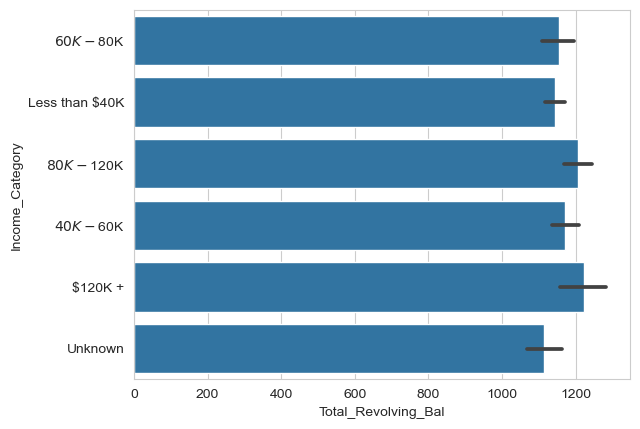

In [34]:
# check revolving balance vs income category
sns.barplot(y='Income_Category', x='Total_Revolving_Bal', data=data, color=sns.color_palette()[0])
data.groupby('Income_Category')['Total_Revolving_Bal'].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Divorced,748.0,1155.981283,817.656415,0.0,189.25,1281.0,1782.5,2517.0
Married,4687.0,1197.163644,810.264662,0.0,604.50,1308.0,1813.0,2517.0
Single,3943.0,1124.241441,816.560346,0.0,0.00,1235.0,1741.0,2517.0
Unknown,749.0,1157.748999,825.692109,0.0,0.00,1261.0,1793.0,2517.0


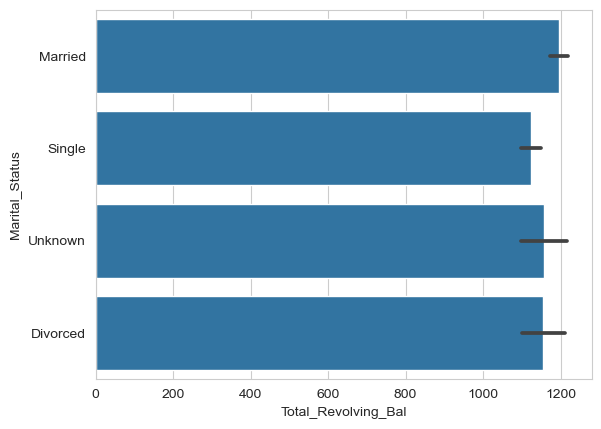

In [35]:
# check revolving balance vs marital status
sns.barplot(y='Marital_Status', x='Total_Revolving_Bal', data=data, color=sns.color_palette()[0])
data.groupby('Marital_Status')['Total_Revolving_Bal'].describe()


In [36]:
# check whether the total transaction amount is greater than the credit limit which indicates overdraw
over_draw = data[data['Total_Trans_Amt'] > data['Credit_Limit']]
over_draw.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
108,Existing Customer,62,F,1,Unknown,Married,Less than $40K,Blue,56,6,0,0,1438.3,0,1438.3,0.813,1951,44,1.095,0.000
169,Existing Customer,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000
226,Existing Customer,45,M,3,College,Single,$60K - $80K,Blue,32,4,1,2,1438.3,0,1438.3,0.810,1468,26,0.625,0.000
354,Existing Customer,55,M,1,Uneducated,Single,$40K - $60K,Blue,49,6,3,2,1443.0,1375,68.0,0.683,1991,38,0.583,0.953
360,Existing Customer,50,F,1,Uneducated,Married,Less than $40K,Blue,43,6,3,4,1438.3,0,1438.3,1.068,1439,41,1.050,0.000


In [39]:
# check the number of account that are overdrawn
print("Percentage of Over Draw Accounts is : {}".format(over_draw.shape[0]/data.shape[0] * 100))
over_draw.shape

Percentage of Over Draw Accounts is : 40.150093808630395


(4066, 20)

In [48]:
# check the number of over draw by attrition flag and plot the pie chart
sns.countplot(y='Attrition_Flag', data=over_draw, color=sns.color_palette()[0])
over_draw['Attrition_Flag'].value_counts()

AttributeError: module 'seaborn' has no attribute 'pieplot'

In [41]:
# check the number of frauds
over_draw['Card_Category'].value_counts()


Card_Category
Blue      4028
Silver      33
Gold         5
Name: count, dtype: int64

Income_Category
Less than $40K    2247
$40K - $60K        838
Unknown            338
$60K - $80K        328
$80K - $120K       236
$120K +             79
Name: count, dtype: int64

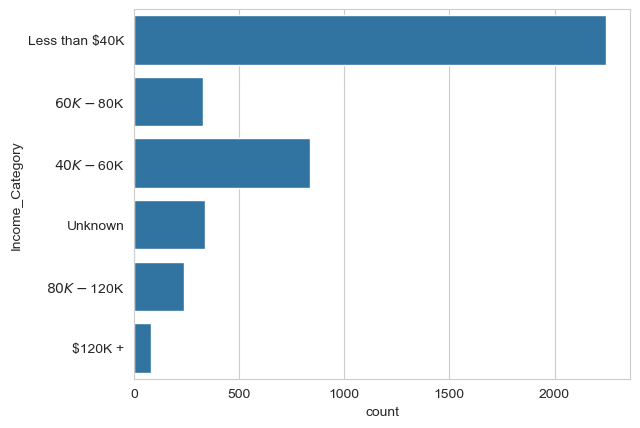

In [46]:
# check the number of over draw by income category  plot the pie chart
sns.countplot(y='Income_Category', data=over_draw, color=sns.color_palette()[0])
over_draw['Income_Category'].value_counts()

Education_Level
Graduate         1220
High School       800
Unknown           636
Uneducated        597
College           409
Post-Graduate     211
Doctorate         193
Name: count, dtype: int64

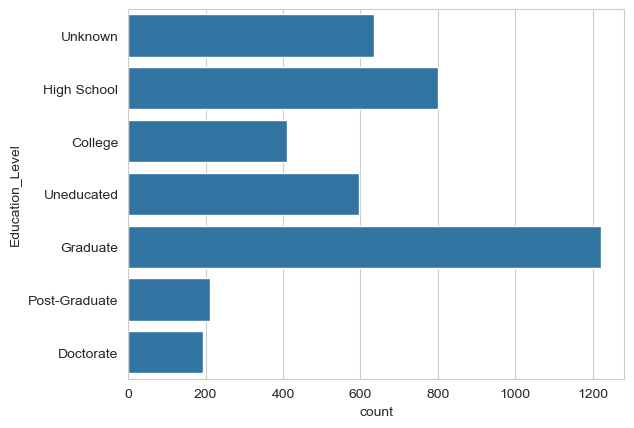

In [45]:
# check the number of over draw by education level and plot the pie chart
sns.countplot(y='Education_Level', data=over_draw, color=sns.color_palette()[0])
over_draw['Education_Level'].value_counts()

Marital_Status
Married     1773
Single      1686
Unknown      317
Divorced     290
Name: count, dtype: int64

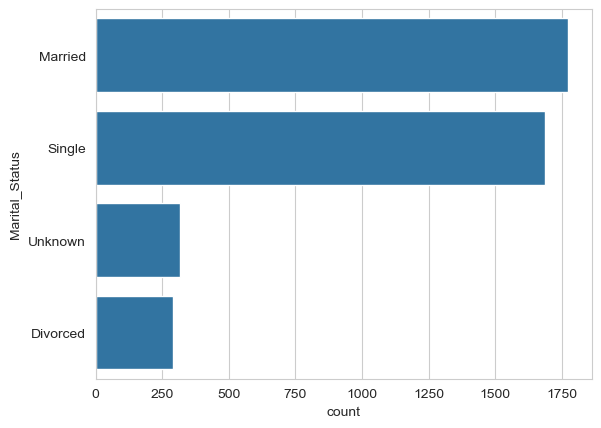

In [47]:
# check the number of over draw by marital status and plot the pie chart
sns.countplot(y='Marital_Status', data=over_draw, color=sns.color_palette()[0])
over_draw['Marital_Status'].value_counts()

In [ ]:
# check the number of frauds
